In [5]:
from cryptocmd import CmcScraper
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

# <b>Calculate log return (Volatility) of BTC </b>

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

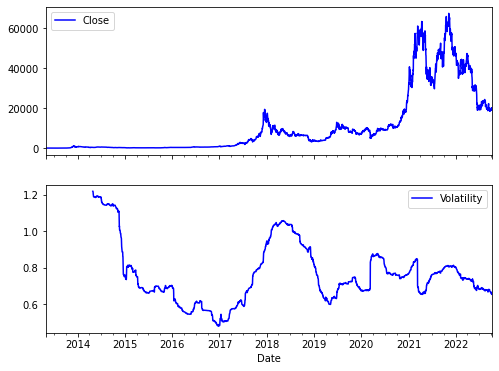

In [12]:
scaper = CmcScraper("BTC", all_time=True, order_ascending=True)
btc_df = scaper.get_dataframe(date_as_index=True)

btc_df['Log_Return'] = np.log(btc_df.Close / btc_df.Close.shift(1))

"""
#? sigma_T = sigma \sqrt{T}
#? sigma_T	=	volatility over a time horizon
#? sigma	=	standard deviation of returns
#? T	=	number of periods in a time horizon
"""
time_frame = 365
btc_df['Volatility'] = btc_df.Log_Return.rolling(window=time_frame).std() * np.sqrt(time_frame)
btc_df[['Close', 'Volatility']].plot(subplots=True, color= 'b', figsize=(8,6))


# <b>Trading Algo with Moving Averages </b>

* Buy signal (go long)
the 61d trend is for the first time SD points above the 365d trend.

* Wait (park in cash)
the 61d trend is within a range of +/– SD points around the 365d trend.

* Sell signal (go short)
the 61d trend is for the first time SD points below the 365d trend.

<AxesSubplot: xlabel='Date'>

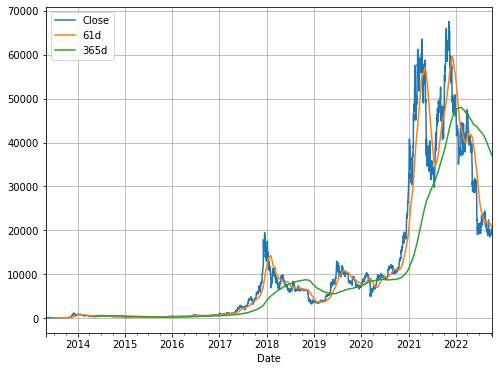

In [20]:
fast_ma = 61
slow_ma = 365
df_fast_ma_col = str(fast_ma)+ 'd'
df_slow_ma_col = str(slow_ma)+ 'd'
btc_df[df_fast_ma_col] =  np.round(btc_df.Close.rolling(window=fast_ma).mean(), 2)
btc_df[df_slow_ma_col] =  np.round(btc_df.Close.rolling(window=slow_ma).mean(), 2)

btc_df[['Close', df_fast_ma_col, df_slow_ma_col]].tail()
btc_df[['Close', df_fast_ma_col, df_slow_ma_col]].plot(grid=True, figsize=(8,6))
